In [150]:
import pandas as pd
import datetime as dt
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline



In [228]:
# Reading in the Moon data (full moon phase vs. Other)
moon_file = "Resources/Moon_Data_Full_Other.csv" 
full_moon_df = pd.read_csv(moon_file)

# Reducing the size of the file to just the columns of interest
full_moon_df = full_moon_df[['Moon Phase', 'Date' ]]

# Converting the Date column to be datetime
full_moon_df['Date'] = pd.to_datetime(full_moon_df['Date'])

# Checking to see if what the data types are and conversion is successful

full_moon_df.info()
display(full_moon_df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Moon Phase  537 non-null    object        
 1   Date        537 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 8.5+ KB


,Moon Phase,Date
0,Other,2024-01-11
1,Other,2024-01-17
2,Full Moon,2024-01-25
3,Other,2024-02-09
4,Other,2024-02-16


In [37]:
# Reading in LA Crime data that was cleaned up previously and setting 'Date' to be the index
la_crime_file ="Resources/LA_Crime.csv" 
la_crime_df = pd.read_csv(la_crime_file)

# Converting the Date column to be datetime
la_crime_df['Date'] = pd.to_datetime(la_crime_df['Date']).dt.date
la_crime_df['Date'] = pd.to_datetime(la_crime_df['Date'])
la_crime_df = la_crime_df.sort_values(by='Date')

# Checking to see if what the data types are and conversion is successful
la_crime_df.info()
display(la_crime_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1004681 entries, 108821 to 959446
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   Date     1004681 non-null  datetime64[ns]
 1   Offense  1004681 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 23.0+ MB


,Date,Offense
108821,2020-01-01,THEFT OF IDENTITY
114595,2020-01-01,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
13579,2020-01-01,VIOLATION OF RESTRAINING ORDER
1793,2020-01-01,"RAPE, FORCIBLE"
13558,2020-01-01,SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...


In [39]:
# Merging datasets 'Moon' data and 'Crime' data, merged on the RIGHT cos we have a larger crime data set than a moon data set. 
# Assigning NaN's with 'Other' moon phase to fill in data gaps on the moon phase
# This data set is also the most granular (ALL CRIMES) data set 
la_crime_moon_merged_df = pd.merge(full_moon_df, la_crime_df, on='Date', how='right').fillna('Other')
la_crime_moon_merged_df = la_crime_moon_merged_df.sort_values(by='Date').reset_index()
la_crime_moon_merged_df = la_crime_moon_merged_df.drop('index', axis=1)

display(la_crime_moon_merged_df.head())
la_crime_moon_merged_df.info()
                            

,Moon Phase,Date,Offense
0,Other,2020-01-01,THEFT OF IDENTITY
1,Other,2020-01-01,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
2,Other,2020-01-01,THEFT FROM MOTOR VEHICLE - ATTEMPT
3,Other,2020-01-01,THEFT PLAIN - PETTY ($950 & UNDER)
4,Other,2020-01-01,"LETTERS, LEWD - TELEPHONE CALLS, LEWD"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006582 entries, 0 to 1006581
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   Moon Phase  1006582 non-null  object        
 1   Date        1006582 non-null  datetime64[ns]
 2   Offense     1006582 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 23.0+ MB


In [40]:
la_crime_moon_merged_df

,Moon Phase,Date,Offense
0,Other,2020-01-01,THEFT OF IDENTITY
1,Other,2020-01-01,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
2,Other,2020-01-01,THEFT FROM MOTOR VEHICLE - ATTEMPT
3,Other,2020-01-01,THEFT PLAIN - PETTY ($950 & UNDER)
4,Other,2020-01-01,"LETTERS, LEWD - TELEPHONE CALLS, LEWD"
...,...,...,...
1006577,Other,2024-12-29,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
1006578,Other,2024-12-30,TRESPASSING
1006579,Other,2024-12-30,BURGLARY FROM VEHICLE
1006580,Other,2024-12-30,BURGLARY FROM VEHICLE


In [44]:
# Aggregrating the total number of offenses on day (as there are multiple crimes per day)
la_crime_by_day = la_crime_moon_merged_df.groupby('Date').agg({'Offense':'count'})
display(la_crime_by_day)


,Offense
Date,
2020-01-01,1163
2020-01-02,528
2020-01-03,596
2020-01-04,541
2020-01-05,506
...,...
2024-12-26,78
2024-12-27,68
2024-12-28,88


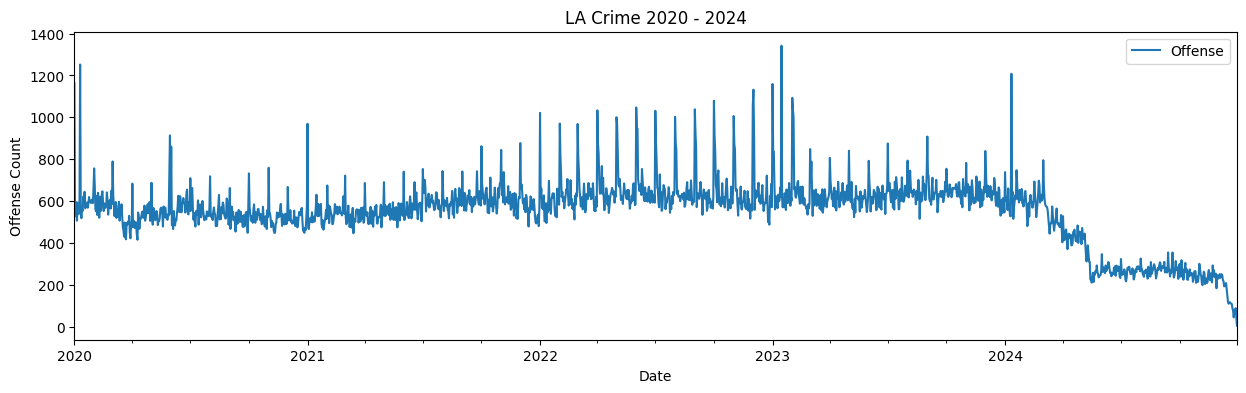

In [132]:
# Resetting index so that I can plot the data
la_crime_to_plot = la_crime_by_day.reset_index()
la_crime_to_plot.plot(x='Date', y='Offense', kind='line', figsize=(15,4))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Offense Count')
plt.title('LA Crime 2020 - 2024')

# Show the plot
plt.show()

In [59]:
display(la_crime_to_plot)

,Date,Offense
0,2020-01-01,1163
1,2020-01-02,528
2,2020-01-03,596
3,2020-01-04,541
4,2020-01-05,506
...,...,...
1821,2024-12-26,78
1822,2024-12-27,68
1823,2024-12-28,88
1824,2024-12-29,48


In [135]:
# Can see that theres a lot of variance in the data, specifically there is a significant drop off in crime in LA in 2024
# Dropping this data off the chart as its going to heavily skew investigations 
la_crime_filtered = la_crime_to_plot.set_index('Date')
la_crime_filtered = la_crime_filtered.loc['2020-01-01':'2024-01-01']
display(la_crime_filtered)

,Offense
Date,
2020-01-01,1163
2020-01-02,528
2020-01-03,596
2020-01-04,541
2020-01-05,506
...,...
2023-12-28,543
2023-12-29,614
2023-12-30,590


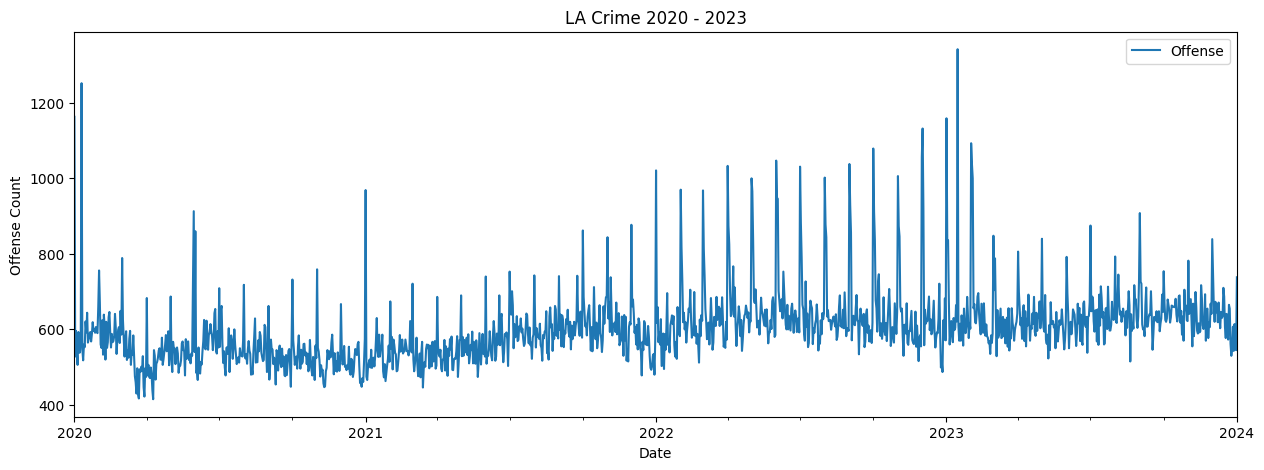

In [145]:
# Plot of crime for years 2020 - 2023 (cutting out outliers)
# Resetting index so that I can plot the data
la_crime_to_plot2 = la_crime_filtered.reset_index()
la_crime_to_plot2.plot(x='Date', y='Offense', kind='line', figsize=(15,5))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Offense Count')
plt.title('LA Crime 2020 - 2023')

# Show the plot
plt.show()

In [64]:
# Merging this data now with Moon Phase Data
crime_by_day_moon_merged_df = pd.merge(full_moon_df, la_crime_filtered, on='Date', how='right').fillna('Other')
crime_by_day_moon_merged_df = crime_by_day_moon_merged_df[['Date', 'Moon Phase', 'Offense']]
display(crime_by_day_moon_merged_df)

,Date,Moon Phase,Offense
0,2020-01-01,Other,1163
1,2020-01-02,Other,528
2,2020-01-03,Other,596
3,2020-01-04,Other,541
4,2020-01-05,Other,506
...,...,...,...
1458,2023-12-27,Full Moon,607
1459,2023-12-28,Other,543
1460,2023-12-29,Other,614
1461,2023-12-30,Other,590


The lower quartile of Crime is: 546.0
The upper quartile of Criime is: 635.0
The interquartile range of Cime is: 89.0
The the median of Crime is: 592.0 
Values below 412.5 could be outliers.
Values above 768.5 could be outliers.


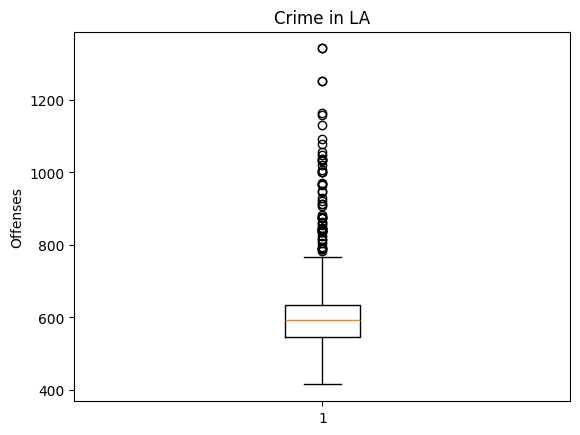

In [117]:
# Looking to understand what are my outliers are (spikes observed) and my normal data distribution
offenses = crime_by_day_moon_merged_df['Offense']


Q1 = offenses.quantile(0.25)
median = offenses.quantile(0.5)
Q3 = offenses.quantile(0.75)
IQR = Q3 - Q1

print(f"The lower quartile of Crime is: {Q1}")
print(f"The upper quartile of Criime is: {Q3}")
print(f"The interquartile range of Cime is: {IQR}")
print(f"The the median of Crime is: {median} ")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

fig1, ax1 = plt.subplots()
ax1.set_title('Crime in LA')
ax1.set_ylabel('Offenses')
ax1.boxplot(offenses)
plt.show()

In [94]:
# OUTLIER CRIME DATA > Creating separate dataset with ONLY Outliers to then compare to phases of moon to see if FUll Moon had any effect on it
la_crime_outlier = crime_by_day_moon_merged_df.loc[(crime_by_day_moon_merged_df['Offense'] > 768)]
outlier_total = la_crime_outlier['Date'].count()
outlier_fullmoons = (la_crime_outlier['Moon Phase'] == 'Full Moon').sum()

print(f'Total # of crimes that lie outside of norm: {outlier_total}')
print(f'Total number of full moons that occured during this period are: {outlier_fullmoons}')
print(f'Outlier crimes are only influenced by {(outlier_fullmoons/outlier_total)*100} %')


Total # of crimes that lie outside of norm: 60
Total number of full moons that occured during this period are: 3
Outlier crimes are only influenced by 5.0 %


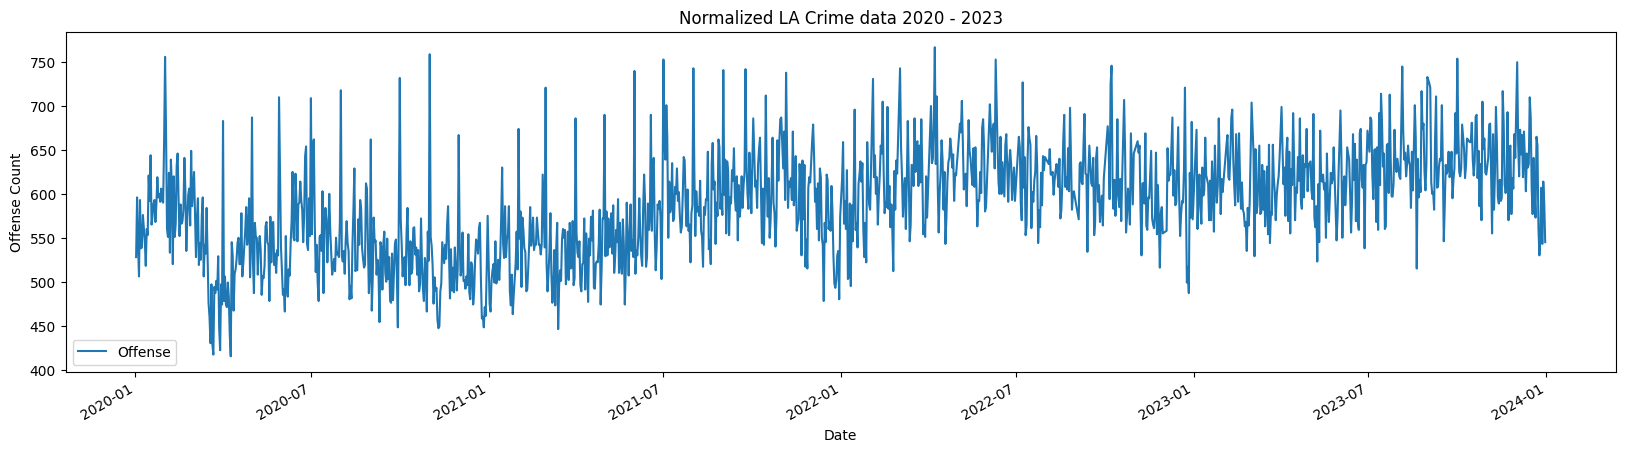

In [139]:
# NORMALIZED CRIME DATA (Sans Outliers) 
la_crime_norm = crime_by_day_moon_merged_df.loc[(crime_by_day_moon_merged_df['Offense'] > 412) &
                                                (crime_by_day_moon_merged_df['Offense'] < 768)] 


#plotting just the normalized crime data
la_crime_to_plot3 = la_crime_norm.reset_index()
la_crime_to_plot3.plot(x='Date', y='Offense', kind='line', figsize=(20,5))

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Offense Count')
plt.title('Normalized LA Crime data 2020 - 2023')

# Show the plot
plt.show()



In [125]:
#Overlaying moon data onto the normalized LA crime data 
#Full Moon dates are marked in red
la_fullmoon_only_crime = la_crime_norm.loc[la_crime_norm['Moon Phase'] == 'Full Moon']
la_crime_to_plot5 = la_fullmoon_only_crime.reset_index()

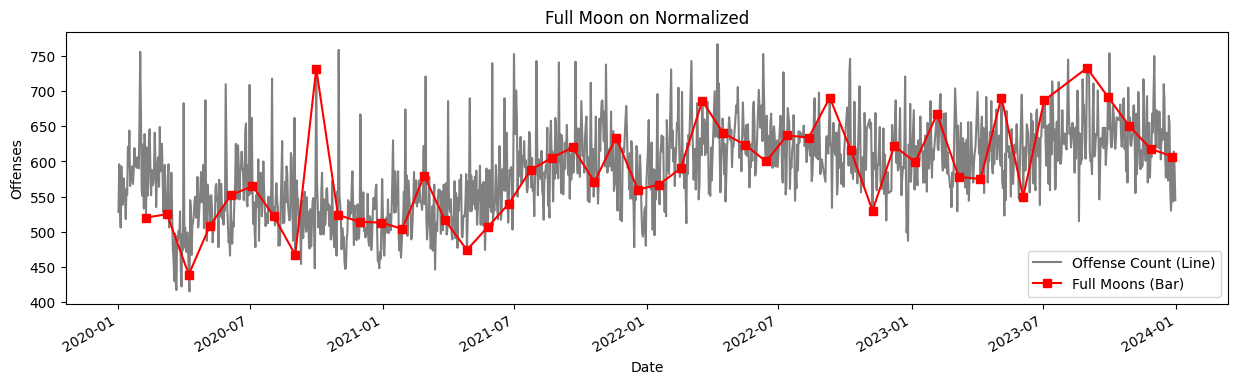

In [210]:
fig2, ax = plt.subplots()

# Plot the line chart
la_crime_to_plot3.plot(x='Date', y='Offense', kind='line', figsize=(15,4), color='gray', ax=ax) 

# Plot the FULL MOON on top as a line chart
la_crime_to_plot5 .plot(x='Date', y='Offense', marker="s", kind='line', figsize=(15,4), color='red', ax=ax) 

# Customize the plot (optional)
plt.xlabel('Date')
plt.ylabel('Offenses')
plt.title('Full Moon on Normalized')
plt.legend(['Offense Count (Line)', 'Full Moons (Bar)'])
plt.show()

In [171]:
# So how do the median number of crimes on Full Moon days vs. Non Full Moon Days
median_full_moon = la_fullmoon_only_crime['Offense'].mean()

median_other_moon = la_crime_norm.loc[la_crime_norm['Moon Phase'] == 'Other', ['Offense']].mean()

print(f'The comparision of non-full moon crime to full moon crime: {median_full_moon / median_other_moon}')

The comparision of non-full moon crime to full moon crime: Offense    0.99842
dtype: float64


In [198]:
# Since crime on full moon days is within normal deviations. Is there a specific type of crime that is popular on full moon days? 
Specific_crime_full_moon = la_crime_moon_merged_df.loc[la_crime_moon_merged_df['Moon Phase'] == 'Full Moon', :].reset_index()
crimes_grouped_full_moon = specific_crime_full_moon.groupby(['Offense']).count()
highest_crime = crimes_grouped_full_moon.sort_values('Date', ascending=False).reset_index()

print(f'The type of crime that occurs the most on Full Moon days is {highest_crime.iloc[0,0]}')
print(f'The type of crime that occurs the 2nd most on Full Moon days is {highest_crime.iloc[1,0]}')
display(highest_crime.head(10))

The type of crime that occurs the most on Full Moon days is VEHICLE - STOLEN
The type of crime that occurs the 2nd most on Full Moon days is BATTERY - SIMPLE ASSAULT


,Offense,Moon Phase,Date
0,VEHICLE - STOLEN,3967,3967
1,BATTERY - SIMPLE ASSAULT,2600,2600
2,BURGLARY FROM VEHICLE,2095,2095
3,BURGLARY,2082,2082
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2061,2061
5,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1907,1907
6,THEFT OF IDENTITY,1877,1877
7,THEFT PLAIN - PETTY ($950 & UNDER),1842,1842
8,INTIMATE PARTNER - SIMPLE ASSAULT,1504,1504
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),1386,1386


In [201]:
# Are these any different than normal (Other Moon days)?
crimes_grouped_all_data = la_crime_moon_merged_df.groupby(['Offense']).count().sort_values('Date', ascending=False).reset_index()

print(f'The type of crime that occurs the most on Full Moon days is {crimes_grouped_all_data.iloc[0,0]}')
print(f'The type of crime that occurs the 2nd most on Full Moon days is {crimes_grouped_all_data.iloc[1,0]}')
display(crimes_grouped_all_data.head(10))

The type of crime that occurs the most on Full Moon days is VEHICLE - STOLEN
The type of crime that occurs the 2nd most on Full Moon days is BATTERY - SIMPLE ASSAULT


,Offense,Moon Phase,Date
0,VEHICLE - STOLEN,115385,115385
1,BATTERY - SIMPLE ASSAULT,74972,74972
2,BURGLARY FROM VEHICLE,63624,63624
3,THEFT OF IDENTITY,62603,62603
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",61162,61162
5,BURGLARY,58014,58014
6,THEFT PLAIN - PETTY ($950 & UNDER),53786,53786
7,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53606,53606
8,INTIMATE PARTNER - SIMPLE ASSAULT,46791,46791
9,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),41402,41402
